<a href="https://colab.research.google.com/github/gargidutta0602/News-Group-Prediction/blob/main/News_Prediction_bert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-text --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 14.6 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from keras.utils import to_categorical
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity


In [3]:
!wget "https://gitlab.com/accredian/insaid-data/-/raw/main/Term%2012%20Natural%20Language%20Processing/Project%204_%20Classification%20-%20Predicting%20the%20Topic%20of%20the%20News/data.zip"

--2024-01-29 07:54:18--  https://gitlab.com/accredian/insaid-data/-/raw/main/Term%2012%20Natural%20Language%20Processing/Project%204_%20Classification%20-%20Predicting%20the%20Topic%20of%20the%20News/data.zip
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2035782 (1.9M) [application/octet-stream]
Saving to: ‘data.zip’

data.zip            100%[===================>]   1.94M  6.48MB/s    in 0.3s    

2024-01-29 07:54:19 (6.48 MB/s) - ‘data.zip’ saved [2035782/2035782]



In [4]:
!unzip "/content/data.zip"

Archive:  /content/data.zip
  inflating: data/news_topic_test.csv  
  inflating: data/news_topic_train.csv  
  inflating: data/sample_submission.csv  


In [6]:
data = pd.read_csv("/content/data/news_topic_train.csv")

In [7]:
data.head()

,Id,title,text,label
0,1490,Oscars steer clear of controversy,The Oscars nominations list has left out som...,entertainment
1,2001,Charvis set to lose fitness bid,Flanker Colin Charvis is unlikely to play an...,sport
2,1572,Corbett attacks 'dumbed-down TV',Ronnie Corbett has joined fellow comedy star...,entertainment
3,1840,Sociedad set to rescue Mladenovic,Rangers are set to loan out-of-favour midfie...,sport
4,610,Doors open at biggest gadget fair,Thousands of technology lovers and industry ...,tech


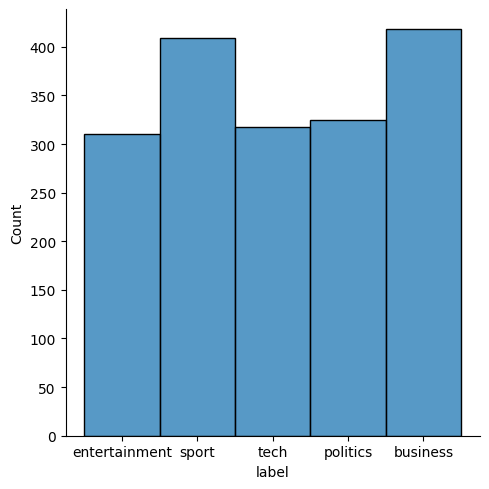

In [8]:
sns.displot(data['label'])

In [9]:
train_data = data.drop(['Id','title'], axis = 1)

In [10]:
train_data.head()

,text,label
0,The Oscars nominations list has left out som...,entertainment
1,Flanker Colin Charvis is unlikely to play an...,sport
2,Ronnie Corbett has joined fellow comedy star...,entertainment
3,Rangers are set to loan out-of-favour midfie...,sport
4,Thousands of technology lovers and industry ...,tech


In [11]:
category_to_id = {'business':0, 'tech':1, 'politics':2, 'sport':3, 'entertainment':4}
id_to_category = {0: 'business', 1: 'tech', 2: 'politics', 3: 'sport', 4: 'entertainment'}

In [12]:
train_data["label"] = train_data["label"].replace(category_to_id)
train_data.head()

,text,label
0,The Oscars nominations list has left out som...,4
1,Flanker Colin Charvis is unlikely to play an...,3
2,Ronnie Corbett has joined fellow comedy star...,4
3,Rangers are set to loan out-of-favour midfie...,3
4,Thousands of technology lovers and industry ...,1


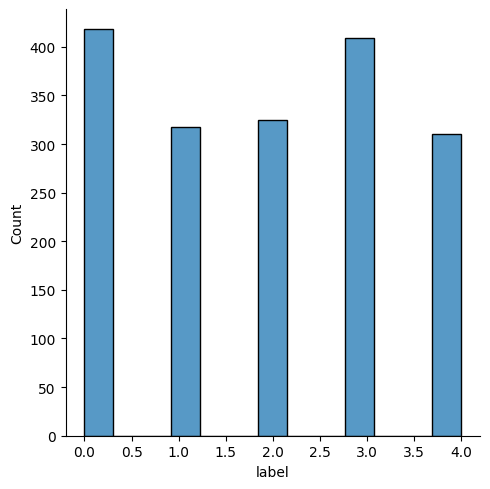

In [13]:
sns.displot(train_data['label'])

In [14]:
x_train = train_data["text"]
y_train = train_data["label"]

In [15]:
x_train

0         The Oscars nominations list has left out som...
1         Flanker Colin Charvis is unlikely to play an...
2         Ronnie Corbett has joined fellow comedy star...
3         Rangers are set to loan out-of-favour midfie...
4         Thousands of technology lovers and industry ...
                              ...                        
1775      Charlie Simpson took his new band Fightstar ...
1776      India's defence minister has opened the coun...
1777      Fiat and General Motors (GM) have until midn...
1778      Shares in Google have fallen 6.7% after empl...
1779      Russian authorities do not have to abide by ...
Name: text, Length: 1780, dtype: object

In [16]:
y_train

0       4
1       3
2       4
3       3
4       1
       ..
1775    4
1776    0
1777    0
1778    0
1779    0
Name: label, Length: 1780, dtype: int64

In [17]:
from tensorflow.keras.utils import to_categorical
Y= to_categorical((train_data['label']))
Y

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [18]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [19]:
ex_test =["news topic prediction"]
t = bert_preprocess(ex_test)
t.keys()

dict_keys(['input_type_ids', 'input_mask', 'input_word_ids'])

In [20]:
t["input_mask"]

<tf.Tensor: shape=(1, 128), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int32)>

In [21]:
ex_result = bert_encoder(t)

In [22]:
ex_result.keys()

dict_keys(['default', 'encoder_outputs', 'sequence_output', 'pooled_output'])

In [23]:
def get_sentence_embedding(sentences):
  preprocessing_text = bert_preprocess(sentences)
  return bert_encoder(preprocessing_text)['pooled_output']

# ***Building the Model***

In [24]:
#Bert layers

text_input = tf.keras.layers.Input(shape=(),dtype = tf.string,name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

In [25]:
#feed forward layers

l = tf.keras.layers.Dropout(0.1, name = "dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(5,activation = 'softmax', name = 'output')(l)

#use input and output to construct the model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [26]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 keras_layer (KerasLayer)    {'input_type_ids': (None,    0         ['text[0][0]']                
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             , 'input_word_ids': (None,                                           
                              128)}                                                               
                                                                                              

In [27]:
mertics = [tf.keras.metrics.BinaryAccuracy(name = 'accuracy'),
           tf.keras.metrics.Precision(name = 'precision'),
           tf.keras.metrics.Recall(name ='recall')]

In [28]:
model.compile(optimizer='adam',loss = 'categorical_crossentropy', metrics = mertics)

In [30]:
history = model.fit (x_train,Y, epochs = 10,batch_size = 36)

Epoch 1/10
50/50 [==============================] - 911s 18s/step - loss: 1.3813 - accuracy: 0.8080 - precision: 0.7205 - recall: 0.0652
Epoch 2/10
50/50 [==============================] - 904s 18s/step - loss: 1.1938 - accuracy: 0.8265 - precision: 0.8026 - recall: 0.1758
Epoch 3/10
50/50 [==============================] - 869s 17s/step - loss: 1.0535 - accuracy: 0.8467 - precision: 0.8741 - recall: 0.2730
Epoch 4/10
50/50 [==============================] - 867s 17s/step - loss: 0.9607 - accuracy: 0.8636 - precision: 0.9066 - recall: 0.3545
Epoch 5/10
50/50 [==============================] - 863s 17s/step - loss: 0.8733 - accuracy: 0.8767 - precision: 0.8876 - recall: 0.4393
Epoch 6/10
50/50 [==============================] - 864s 17s/step - loss: 0.8029 - accuracy: 0.8928 - precision: 0.9284 - recall: 0.5028
Epoch 7/10
50/50 [==============================] - 880s 18s/step - loss: 0.7470 - accuracy: 0.9024 - precision: 0.9245 - recall: 0.5573
Epoch 8/10
50/50 [=======================

In [32]:
news_test = pd.read_csv("/content/data/news_topic_train.csv")

In [50]:
news_test.head(20)

,Id,title,text,label
0,1490,Oscars steer clear of controversy,The Oscars nominations list has left out som...,entertainment
1,2001,Charvis set to lose fitness bid,Flanker Colin Charvis is unlikely to play an...,sport
2,1572,Corbett attacks 'dumbed-down TV',Ronnie Corbett has joined fellow comedy star...,entertainment
3,1840,Sociedad set to rescue Mladenovic,Rangers are set to loan out-of-favour midfie...,sport
4,610,Doors open at biggest gadget fair,Thousands of technology lovers and industry ...,tech
5,23,Brown visits slum on Africa trip,Chancellor Gordon Brown has visited Kenya's ...,politics
6,1904,Ruddock backs Yapp's credentials,Wales coach Mike Ruddock says John Yapp has ...,sport
7,427,Online games play with politics,"After bubbling under for some time, online g...",tech
8,861,US to probe airline travel chaos,The US government is to investigate two airl...,business
9,988,Russia WTO talks 'make progress',Talks on Russia's proposed membership of the...,business


In [36]:
y_pred = model.predict(news_test["text"])

56/56 [==============================] - 870s 15s/step


In [38]:
y_pred

array([[0.08487782, 0.11302226, 0.04406916, 0.05498926, 0.7030414 ],
       [0.16859673, 0.0289482 , 0.03503278, 0.7188519 , 0.04857028],
       [0.04718668, 0.1051298 , 0.3500934 , 0.08630531, 0.41128483],
       ...,
       [0.8183263 , 0.0633453 , 0.06007678, 0.02872706, 0.02952462],
       [0.66959226, 0.21406296, 0.06850947, 0.00398431, 0.04385097],
       [0.7059714 , 0.13163804, 0.02348518, 0.02840058, 0.1105048 ]],
      dtype=float32)

In [39]:
id_to_category = {0: 'business', 1: 'tech', 2: 'politics', 3: 'sport', 4: 'entertainment'}

In [40]:
final_pred = np.round(y_pred).astype(int)
final_pred

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]])

In [41]:
y = np.argmax(final_pred, axis=-1)

In [42]:
y

array([4, 3, 0, ..., 0, 0, 0])

In [44]:
df = pd.DataFrame(y, columns = ["label"])

In [47]:
submission = pd.DataFrame({'Id':news_test['Id'],'label':df['label']})

In [49]:
submission = submission.replace(id_to_category)
submission.to_csv('Submission.csv',header=False,index=False)